In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
import keras.backend as K
from keras import optimizers

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Load & Scale Data

In [2]:
df_train = pd.read_csv("votes-train.csv")
df_test = pd.read_csv("votes-test.csv")
df_train.head(20)

,Democrat,population,population_change,age65plus,Black,Hispanic,Edu_bachelors,income,Poverty,Density
0,0,55395,1.5,13.8,0.187,0.027,20.9,53682,12.1,91.8
1,0,8433,-2.0,19.3,0.008,0.028,19.9,51793,9.1,13.7
2,0,15080,0.7,18.4,0.036,0.025,9.0,38019,18.4,26.7
3,0,29317,-1.0,15.6,0.030,0.113,13.7,39267,20.6,23.2
4,0,68838,-0.7,19.9,0.045,0.058,12.5,33159,22.7,91.9
5,0,20652,1.0,17.6,0.022,0.033,14.8,44149,16.9,20.7
6,0,3430,0.0,12.3,0.004,0.034,15.9,37607,39.3,2.9
7,0,163820,1.4,15.6,0.073,0.027,36.0,58080,13.9,390.5
8,0,66600,-1.8,19.5,0.099,0.041,17.0,36334,21.5,120.2
9,0,21362,-1.4,18.7,0.006,0.030,20.0,53057,8.3,41.4


In [23]:
#Preparing training and testing inputs and target matrices
#using all features
xtr = np.array(df_train[df_train.columns[1:]])
ytr = np.array(df_train['Democrat'])
xts = np.array(df_test[df_test.columns[1:]])
yts = np.array(df_test['Democrat'])


#feature scaling of input matrices xtr, xts
xtr = (xtr - np.mean(xtr, axis=0))/(np.std(xtr, axis=0))
xts = (xts - np.mean(xts, axis=0))/(np.std(xts, axis=0))

# Creating Neural Network

In [28]:
K.clear_session()
nh=1000             #number of hidden units
N = xtr.shape[1]  #number of features, aka number of input neurons
M = 2             #number of output neurons. 
model = Sequential()
model.add(Dense(nh, input_shape=(N,), activation='sigmoid', name='hidden'))
model.add(Dense(M, activation="softmax", name="output"))

opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 1000)              10000     
_________________________________________________________________
output (Dense)               (None, 2)                 2002      
Total params: 12,002
Trainable params: 12,002
Non-trainable params: 0
_________________________________________________________________


# Training the Neural Network

In [30]:
model.fit(xtr, ytr, epochs=291, batch_size=100, validation_data=(xts, yts))

Train on 2334 samples, validate on 777 samples
Epoch 1/291
2334/2334 [==============================] - 0s 50us/step - loss: 0.1623 - acc: 0.9310 - val_loss: 0.1861 - val_acc: 0.9266
Epoch 2/291
2334/2334 [==============================] - 0s 42us/step - loss: 0.1589 - acc: 0.9319 - val_loss: 0.1799 - val_acc: 0.9228
Epoch 3/291
2334/2334 [==============================] - 0s 40us/step - loss: 0.1568 - acc: 0.9366 - val_loss: 0.1848 - val_acc: 0.9228
Epoch 4/291
2334/2334 [==============================] - 0s 40us/step - loss: 0.1562 - acc: 0.9366 - val_loss: 0.1819 - val_acc: 0.9305
Epoch 5/291
2334/2334 [==============================] - 0s 38us/step - loss: 0.1623 - acc: 0.9336 - val_loss: 0.1859 - val_acc: 0.9241
Epoch 6/291
2334/2334 [==============================] - 0s 42us/step - loss: 0.1625 - acc: 0.9319 - val_loss: 0.1792 - val_acc: 0.9266
Epoch 7/291
2334/2334 [==============================] - 0s 55us/step - loss: 0.1718 - acc: 0.9306 - val_loss: 0.1958 - val_acc: 0.9163
E

Epoch 60/291
2334/2334 [==============================] - 0s 46us/step - loss: 0.1493 - acc: 0.9387 - val_loss: 0.1747 - val_acc: 0.9266
Epoch 61/291
2334/2334 [==============================] - 0s 47us/step - loss: 0.1545 - acc: 0.9383 - val_loss: 0.1737 - val_acc: 0.9279
Epoch 62/291
2334/2334 [==============================] - 0s 42us/step - loss: 0.1459 - acc: 0.9413 - val_loss: 0.1766 - val_acc: 0.9266
Epoch 63/291
2334/2334 [==============================] - 0s 41us/step - loss: 0.1493 - acc: 0.9392 - val_loss: 0.1752 - val_acc: 0.9292
Epoch 64/291
2334/2334 [==============================] - 0s 37us/step - loss: 0.1511 - acc: 0.9340 - val_loss: 0.1909 - val_acc: 0.9189
Epoch 65/291
2334/2334 [==============================] - 0s 34us/step - loss: 0.1522 - acc: 0.9392 - val_loss: 0.1845 - val_acc: 0.9292
Epoch 66/291
2334/2334 [==============================] - 0s 35us/step - loss: 0.1520 - acc: 0.9387 - val_loss: 0.1794 - val_acc: 0.9266
Epoch 67/291
2334/2334 [=================

2334/2334 [==============================] - 0s 41us/step - loss: 0.1361 - acc: 0.9447 - val_loss: 0.1703 - val_acc: 0.9305
Epoch 178/291
2334/2334 [==============================] - 0s 36us/step - loss: 0.1352 - acc: 0.9439 - val_loss: 0.1745 - val_acc: 0.9318
Epoch 179/291
2334/2334 [==============================] - 0s 33us/step - loss: 0.1361 - acc: 0.9456 - val_loss: 0.1725 - val_acc: 0.9266
Epoch 180/291
2334/2334 [==============================] - 0s 32us/step - loss: 0.1358 - acc: 0.9473 - val_loss: 0.1728 - val_acc: 0.9331
Epoch 181/291
2334/2334 [==============================] - 0s 34us/step - loss: 0.1371 - acc: 0.9443 - val_loss: 0.1707 - val_acc: 0.9318
Epoch 182/291
2334/2334 [==============================] - 0s 30us/step - loss: 0.1369 - acc: 0.9409 - val_loss: 0.1937 - val_acc: 0.9189
Epoch 183/291
2334/2334 [==============================] - 0s 32us/step - loss: 0.1543 - acc: 0.9387 - val_loss: 0.1723 - val_acc: 0.9305
Epoch 184/291
2334/2334 [=======================

In [33]:
score, acc1 = model.evaluate(xts, yts, verbose=0)
print("Accuracy on testing samples=", acc1)

Accuracy on testing samples= 0.930501930502


# Training with the best feature combination from subset regression

In [36]:
#returns np array made of columns named i feature list
def colum(df, feature):
    return np.column_stack([ np.array(df[f]) for f in feature])

In [39]:
col = ('population', 'population_change', 'Black', 'Hispanic', 'Edu_bachelors', 'income', 'Poverty', 'Density')
xtr_best = colum(df_train, col)
xts_best = colum(df_test, col)

xtr_best = (xtr_best - np.mean(xtr_best, axis=0))/np.std(xtr_best, axis=0)
xts_best = (xts_best - np.mean(xts_best, axis=0))/np.std(xts_best, axis=0)

In [40]:
K.clear_session()
nh=1000             #number of hidden units
N = xtr_best.shape[1]  #number of features, aka number of input neurons
M = 2             #number of output neurons. 
model = Sequential()
model.add(Dense(nh, input_shape=(N,), activation='sigmoid', name='hidden'))
model.add(Dense(M, activation="softmax", name="output"))

opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 1000)              9000      
_________________________________________________________________
output (Dense)               (None, 2)                 2002      
Total params: 11,002
Trainable params: 11,002
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(xtr_best, ytr, epochs=200, batch_size=100, validation_data=(xts_best, yts))

Train on 2334 samples, validate on 777 samples
Epoch 1/200
2334/2334 [==============================] - 0s 44us/step - loss: 0.1300 - acc: 0.9460 - val_loss: 0.1904 - val_acc: 0.9318
Epoch 2/200
2334/2334 [==============================] - 0s 46us/step - loss: 0.1315 - acc: 0.9464 - val_loss: 0.1806 - val_acc: 0.9369
Epoch 3/200
2334/2334 [==============================] - 0s 39us/step - loss: 0.1238 - acc: 0.9524 - val_loss: 0.1775 - val_acc: 0.9318
Epoch 4/200
2334/2334 [==============================] - 0s 43us/step - loss: 0.1228 - acc: 0.9486 - val_loss: 0.1787 - val_acc: 0.9344
Epoch 5/200
2334/2334 [==============================] - 0s 35us/step - loss: 0.1243 - acc: 0.9512 - val_loss: 0.1873 - val_acc: 0.9292
Epoch 6/200
2334/2334 [==============================] - 0s 34us/step - loss: 0.1231 - acc: 0.9490 - val_loss: 0.1793 - val_acc: 0.9318
Epoch 7/200
2334/2334 [==============================] - 0s 34us/step - loss: 0.1210 - acc: 0.9507 - val_loss: 0.1769 - val_acc: 0.9344
E

Epoch 120/200
2334/2334 [==============================] - 0s 41us/step - loss: 0.1200 - acc: 0.9516 - val_loss: 0.1795 - val_acc: 0.9344
Epoch 121/200
2334/2334 [==============================] - 0s 33us/step - loss: 0.1202 - acc: 0.9507 - val_loss: 0.1831 - val_acc: 0.9344
Epoch 122/200
2334/2334 [==============================] - 0s 31us/step - loss: 0.1197 - acc: 0.9499 - val_loss: 0.1832 - val_acc: 0.9331
Epoch 123/200
2334/2334 [==============================] - 0s 35us/step - loss: 0.1184 - acc: 0.9529 - val_loss: 0.1814 - val_acc: 0.9344
Epoch 124/200
2334/2334 [==============================] - 0s 34us/step - loss: 0.1210 - acc: 0.9477 - val_loss: 0.1921 - val_acc: 0.9266
Epoch 125/200
2334/2334 [==============================] - 0s 35us/step - loss: 0.1244 - acc: 0.9499 - val_loss: 0.1792 - val_acc: 0.9356
Epoch 126/200
2334/2334 [==============================] - 0s 34us/step - loss: 0.1189 - acc: 0.9520 - val_loss: 0.1813 - val_acc: 0.9356
Epoch 127/200
2334/2334 [=========

In [62]:
score, acc2 = model.evaluate(xts_best, yts, verbose=0)
print("Accuracy on testing samples for best Feature Combo=", acc2)

Accuracy on testing samples for best Feature Combo= 0.93564993565


# Training with Worst Feature Combo from subset regression

In [57]:
xtr_worst = np.array(df_train["age65plus"])
xts_worst = np.array(df_test["age65plus"])

xtr_worst = (xtr_worst - np.mean(xtr_worst, axis=0))/np.std(xtr_worst, axis=0)
xts_worst = (xts_worst - np.mean(xts_worst, axis=0))/np.std(xts_worst, axis=0)


In [59]:
K.clear_session()
nh=1000             #number of hidden units
N = 1 #number of features, aka number of input neurons
M = 2             #number of output neurons. 
model = Sequential()
model.add(Dense(nh, input_shape=(N,), activation='sigmoid', name='hidden'))
model.add(Dense(M, activation="softmax", name="output"))

opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 1000)              2000      
_________________________________________________________________
output (Dense)               (None, 2)                 2002      
Total params: 4,002
Trainable params: 4,002
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(xtr_worst, ytr, epochs=200, batch_size=100, validation_data=(xts_worst, yts))

Train on 2334 samples, validate on 777 samples
Epoch 1/200
2334/2334 [==============================] - 0s 211us/step - loss: 0.4707 - acc: 0.8213 - val_loss: 0.4704 - val_acc: 0.8314
Epoch 2/200
2334/2334 [==============================] - 0s 44us/step - loss: 0.4038 - acc: 0.8470 - val_loss: 0.4196 - val_acc: 0.8301
Epoch 3/200
2334/2334 [==============================] - 0s 44us/step - loss: 0.3875 - acc: 0.8470 - val_loss: 0.4357 - val_acc: 0.8314
Epoch 4/200
2334/2334 [==============================] - 0s 39us/step - loss: 0.3851 - acc: 0.8479 - val_loss: 0.4316 - val_acc: 0.8211
Epoch 5/200
2334/2334 [==============================] - 0s 57us/step - loss: 0.3900 - acc: 0.8470 - val_loss: 0.4368 - val_acc: 0.8301
Epoch 6/200
2334/2334 [==============================] - 0s 32us/step - loss: 0.3875 - acc: 0.8488 - val_loss: 0.4159 - val_acc: 0.8185
Epoch 7/200
2334/2334 [==============================] - 0s 36us/step - loss: 0.3856 - acc: 0.8428 - val_loss: 0.4148 - val_acc: 0.8237


Epoch 120/200
2334/2334 [==============================] - 0s 40us/step - loss: 0.3867 - acc: 0.8440 - val_loss: 0.4172 - val_acc: 0.8185
Epoch 121/200
2334/2334 [==============================] - 0s 37us/step - loss: 0.3903 - acc: 0.8436 - val_loss: 0.4297 - val_acc: 0.8250
Epoch 122/200
2334/2334 [==============================] - 0s 35us/step - loss: 0.3786 - acc: 0.8466 - val_loss: 0.4179 - val_acc: 0.8263
Epoch 123/200
2334/2334 [==============================] - 0s 34us/step - loss: 0.3797 - acc: 0.8458 - val_loss: 0.4174 - val_acc: 0.8198
Epoch 124/200
2334/2334 [==============================] - 0s 36us/step - loss: 0.3848 - acc: 0.8458 - val_loss: 0.4157 - val_acc: 0.8185
Epoch 125/200
2334/2334 [==============================] - 0s 38us/step - loss: 0.3799 - acc: 0.8453 - val_loss: 0.4285 - val_acc: 0.8263
Epoch 126/200
2334/2334 [==============================] - 0s 34us/step - loss: 0.3872 - acc: 0.8475 - val_loss: 0.4157 - val_acc: 0.8250
Epoch 127/200
2334/2334 [=========

In [63]:
score, acc3 = model.evaluate(xts_worst, yts, verbose=0)
print("Accuracy on testing samples for best Feature Combo=", acc3)

Accuracy on testing samples for best Feature Combo= 0.824967825045


# Plotting All Features, Best featuers and Worst Features training accuracy

Text(0,0.5,'Accuracy')

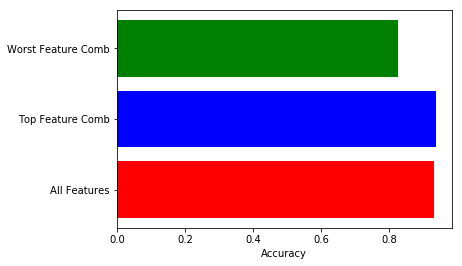

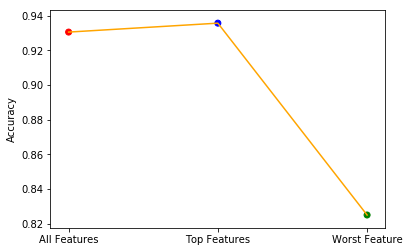

In [96]:
plt.barh([1,2,3],[acc1,acc2,acc3],color=['red', 'blue', 'green'])
plt.yticks([1,2,3], ["All Features", "Top Feature Comb", "Worst Feature Comb"])
plt.xlabel("Accuracy")

f = plt.figure()
ax = f.add_subplot(111)
ax.plot(["All Features","Top Features","Worst Feature"],[acc1,acc2,acc3], color='orange')
ax.scatter(["All Features","Top Features","Worst Feature"],[acc1,acc2,acc3], color=['red', 'blue', 'green'])
plt.ylabel("Accuracy")